## 1. 
Módulo  Kaggle Intro to Machine Learning:

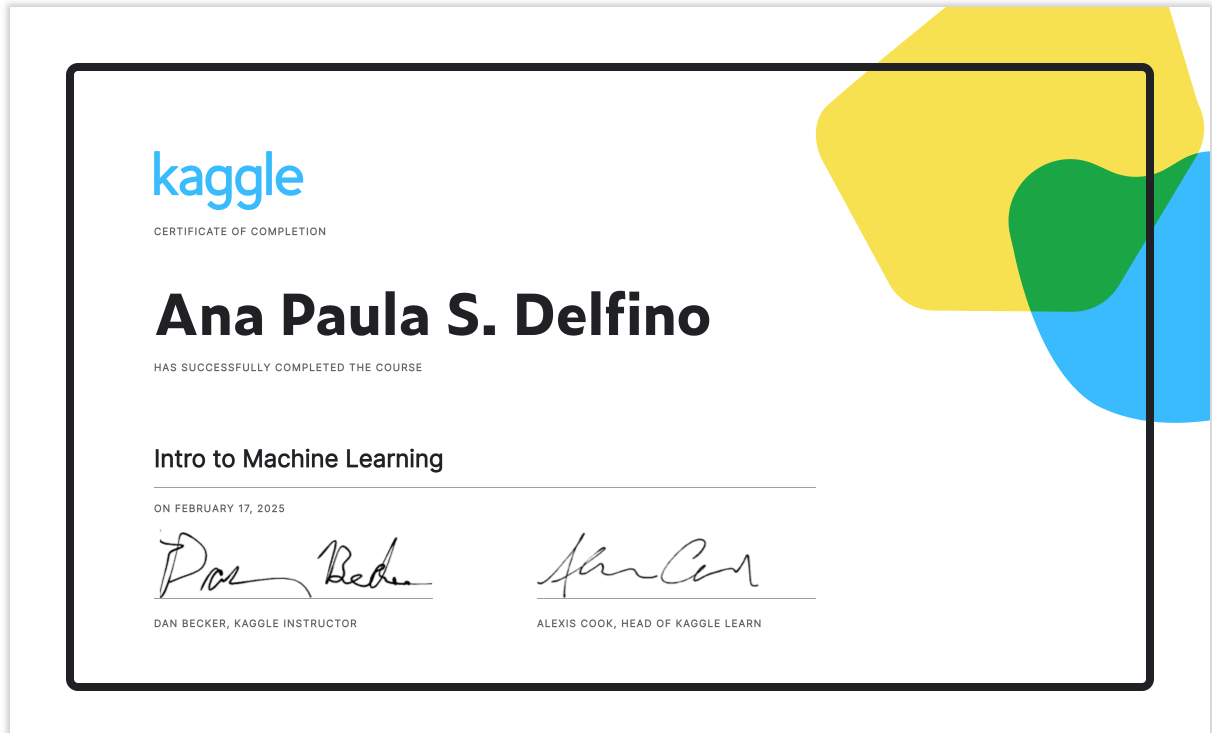

In [1]:
from PIL import Image

image = Image.open('Captura de Tela 2025-02-17 às 13.29.18.png')

image

In [50]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
# para normalização - MinMaxScaler
# para padronização normal - StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score

from plot_aux import plot_boxplots_by_columns, plot_by_columns, plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

ImportError: cannot import name 'plot_confusion_matrix' from 'plot_aux' (/Users/anapaula/projects/infnet_classificacao/plot_aux.py)

## 2. 
Para as questões 2-5 usaremos apenas os vinhos do tipo "branco".

In [3]:
df = pd.read_csv("winequalityN.csv")

In [4]:
df = df[df['type']=='white'].copy()


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df['opinion'] = df['quality'].apply(lambda r: 0 if r <= 5 else 1)
df = df.drop(columns=['quality', 'type'])

## 3.
Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

`Resposta`: Todas as variáveis são continuas, exceto opnion que é uma variável binária, assumindo valores 0 ou 1.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4890 non-null   float64
 1   volatile_acidity      4891 non-null   float64
 2   citric_acid           4896 non-null   float64
 3   residual_sugar        4896 non-null   float64
 4   chlorides             4896 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   ph                    4891 non-null   float64
 9   sulphates             4896 non-null   float64
 10  alcohol               4898 non-null   float64
 11  opinion               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 497.5 KB


In [8]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,opinion
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,0.665169
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [9]:
df.isna().sum()

fixed_acidity           8
volatile_acidity        7
citric_acid             2
residual_sugar          2
chlorides               2
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      7
sulphates               2
alcohol                 0
opinion                 0
dtype: int64

In [10]:
df[df['fixed_acidity'].isna()==True]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,opinion
17,NaN,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,1
174,NaN,0.27,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,0
249,NaN,0.41,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,0
267,NaN,0.58,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,0
368,NaN,0.29,0.48,2.3,0.049,36.0,178.0,0.99310,3.17,0.64,10.6,1
518,NaN,0.13,0.28,1.9,0.050,20.0,78.0,0.99180,3.43,0.64,10.8,1
1079,NaN,NaN,0.29,6.2,0.046,29.0,227.0,0.99520,3.29,0.53,10.1,1
2902,NaN,0.36,0.14,8.9,0.036,38.0,155.0,0.99622,3.27,NaN,9.4,0


##  4.A 
Descreva as etapas necessárias para criar um modelo de classificação eficiente.

1. Definição do Problema
- Identificar claramente o objetivo do modelo e as métricas de sucesso técnicas (F1-score, precisão, recall, AUC-ROC) e de negócio .   
2. Coleta e Preparação dos Dados
- Obtenção dos dados: Coletar os dados necessários para a modelagem
- Limpeza: Remover duplicatas, lidar com valores ausentes e tratar outliers
- Transformação: Normalização, padronização ou codificação de variáveis categóricas
- Feature Engineering: Criar novas variáveis relevantes e reduzir a dimensionalidade se necessário.
- Verificar balanceamento dos dados e aplicar técnicas de técnicas de balanceamento de classes, se necessário.
- Divisão dos dados: Separar em treino, validação e teste.
3. Seleção do Modelo e Treinamento
- Escolher algoritmos adequados para o problema
- Ajustar hiperparâmetros usando validação cruzada.
4. Avaliação do Modelo
- Medir desempenho usando métricas  de sucesso
- Comparar diferentes modelos e escolher o mais adequado.
5. Ajustes e Otimização
- Refinar hiperparâmetros dos modelos escolhidos para o problema, observando se há overfitting
- Se necessário pode se testar diferentes representações de features
6. Implementação e Monitoramento
- Implantar em produção 
- Monitorar desempenho e re-treinar o modelo conforme necessário

In [11]:
x = df.drop(['opinion'], axis=1)
y = df[['opinion']]

In [12]:
df['opinion'].value_counts(normalize=True)

opinion
1    0.665169
0    0.334831
Name: proportion, dtype: float64

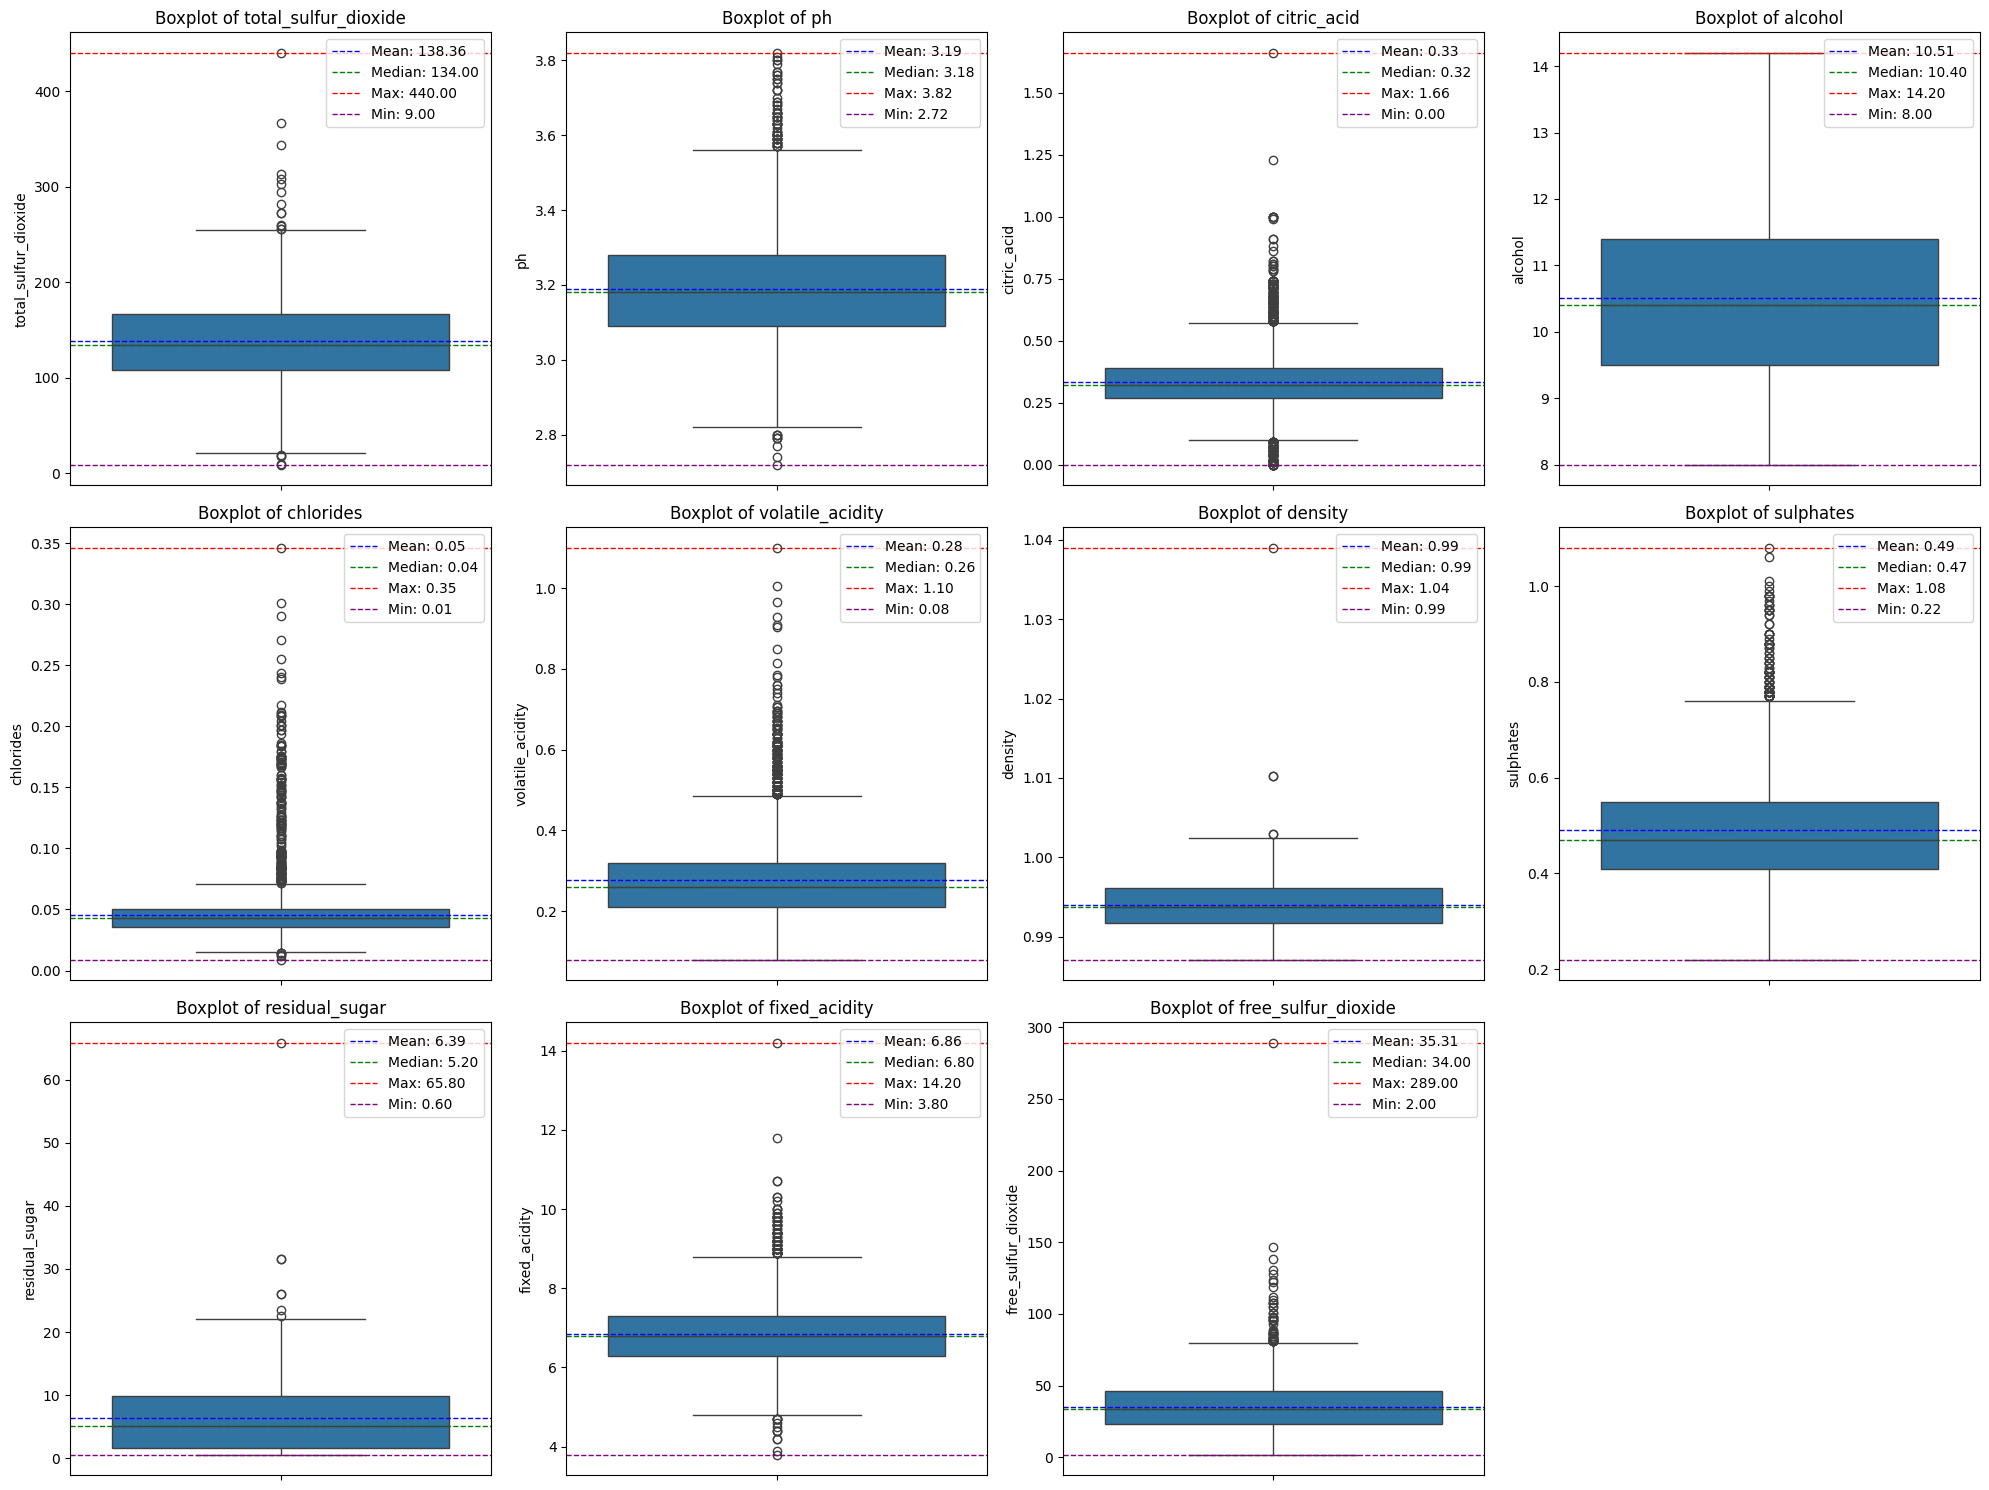

In [13]:
features_list = df.select_dtypes("float").columns.tolist()
plot_boxplots_by_columns(df,features_list)

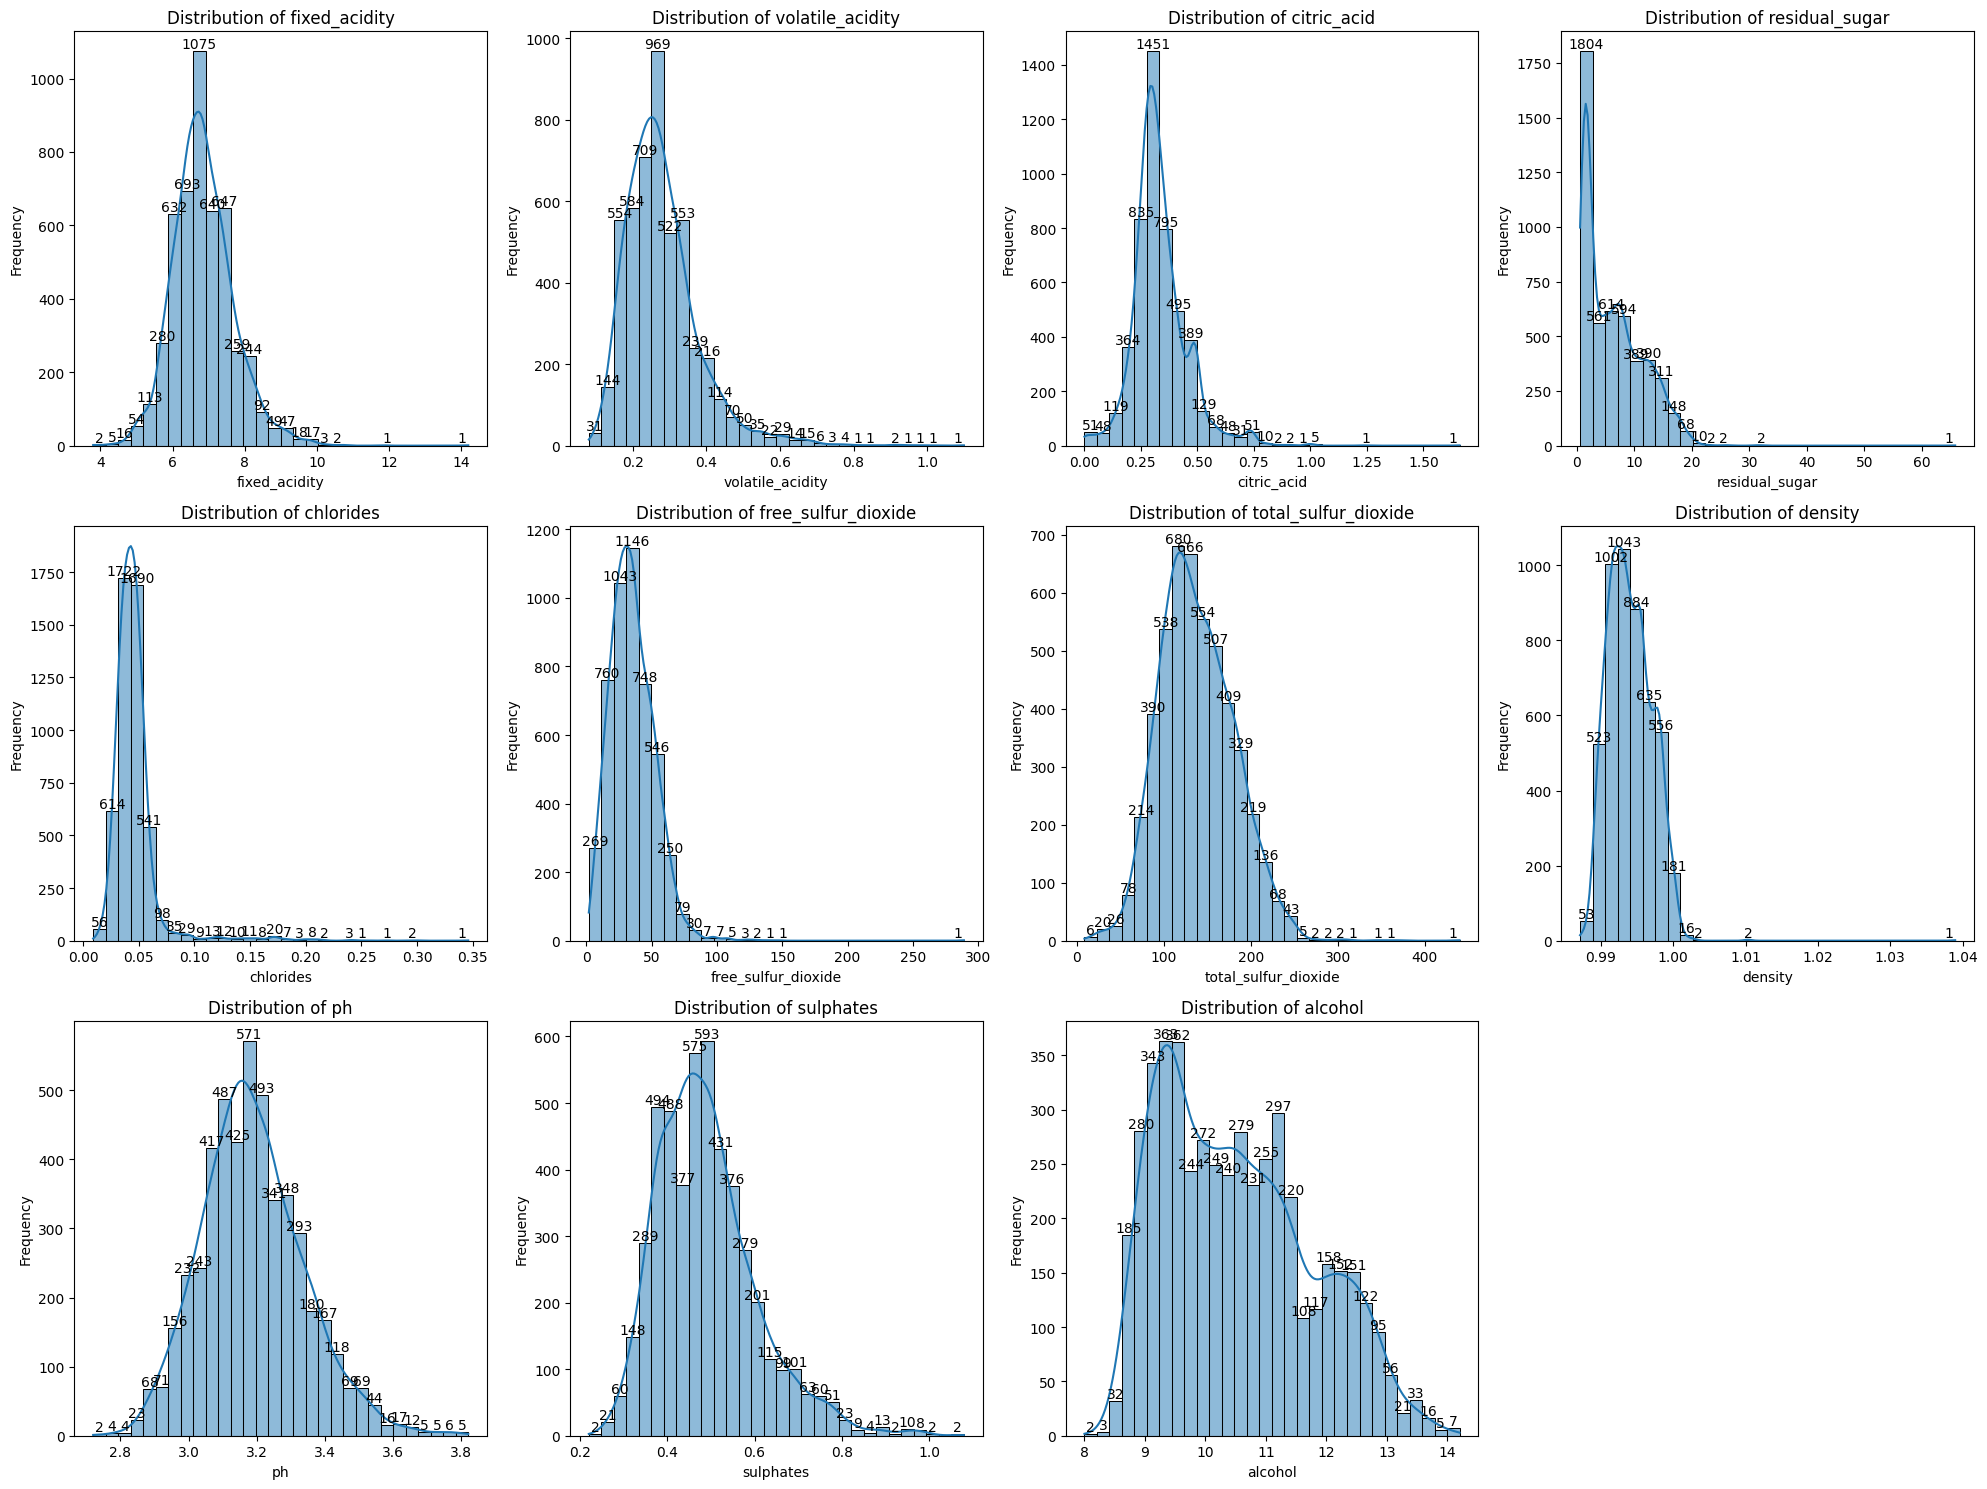

In [14]:
plot_by_columns(df,features_list)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

##  4.B 
Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
- i. a média e desvio da acurácia dos modelos obtidos;
- ii. a média e desvio da precisão dos modelos obtidos;
- iii. a média e desvio da recall dos modelos obtidos;
- iv. a média e desvio do f1-score dos modelos obtidos.

In [43]:
reglog = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', RobustScaler()),
    ('model', LogisticRegression(solver='saga'))
])

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=25)

scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0)
}

params_grid = {
    'model__penalty': ['l1', 'l2', 'elasticnet', None],
    'model__C': [0.001, 0.01, 0.08, 0.1, 0.02, 1, 10],
    'model__l1_ratio': [0.25, 0.5, 0.75],
    'model__class_weight': ['balanced', None]
}

search_reglog = GridSearchCV(
    estimator=reglog,
    param_grid=params_grid,
    scoring=scoring_metrics,
    cv=splitter,
    refit='f1',
    error_score=0,
    verbose=0
)

In [44]:
search_reglog.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=25, shuffle=True),
             error_score=0,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', RobustScaler()),
                                       ('model',
                                        LogisticRegression(solver='saga'))]),
             param_grid={'model__C': [0.001, 0.01, 0.08, 0.1, 0.02, 1, 10],
                         'model__class_weight': ['balanced', None],
                         'model__l1_ratio': [0.25,...
                         'model__penalty': ['l1', 'l2', 'elasticnet', None]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict', zero_division=0),
                      'precision': make_scorer(precision_score, response_method='predict', zero_division=0),
                      'recall': make_scorer(recall_score, response_method='predict', zero_division=0)})

In [45]:
search_reglog.best_params_

{'model__C': 0.08,
 'model__class_weight': None,
 'model__l1_ratio': 0.5,
 'model__penalty': None}

In [46]:
search_reglog.best_score_

np.float64(0.8217975117813149)

In [40]:
# fazendo a previsão do teste
y_test_predict = search_reglog.predict(x_test)
y_train_predict = search_reglog.predict(x_train)

print('Desempenho - Base de Treino')
print(classification_report(y_train, y_train_predict))
print('Desempenho - Base de Teste')
print(classification_report(y_test, y_test_predict))

Desempenho - Base de Treino
              precision    recall  f1-score   support

           0       0.66      0.50      0.57      1148
           1       0.77      0.87      0.82      2280

    accuracy                           0.75      3428
   macro avg       0.72      0.68      0.69      3428
weighted avg       0.74      0.75      0.74      3428

Desempenho - Base de Teste
              precision    recall  f1-score   support

           0       0.66      0.54      0.60       492
           1       0.79      0.86      0.82       978

    accuracy                           0.76      1470
   macro avg       0.73      0.70      0.71      1470
weighted avg       0.75      0.76      0.75      1470



In [ ]:
plot_confusion_matrix(y_test, y_pred)

In [47]:
cv_results = search_reglog.cv_results_

In [48]:
metrics = ["mean_test_accuracy", "mean_test_precision", "mean_test_recall", "mean_test_f1"]
std_metrics = ["std_test_accuracy", "std_test_precision", "std_test_recall", "std_test_f1"]

# Print results
for mean_metric, std_metric in zip(metrics, std_metrics):
    mean_value = np.mean(cv_results[mean_metric])
    std_value = np.mean(cv_results[std_metric])
    print(f"{mean_metric.replace('mean_test_', '').capitalize()}: Média = {mean_value:.4f}, Desvio Padrão = {std_value:.4f}")

Accuracy: Média = 0.7190, Desvio Padrão = 0.0271
Precision: Média = 0.7850, Desvio Padrão = 0.0274
Recall: Média = 0.7940, Desvio Padrão = 0.0453
F1: Média = 0.7819, Desvio Padrão = 0.0312


##  4.C
Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
- i. a média e desvio da acurácia dos modelos obtidos;
- ii. a média e desvio da precisão dos modelos obtidos;
- iii. a média e desvio da recall dos modelos obtidos;
- iv. a média e desvio do f1-score dos modelos obtidos.

In [ ]:
# criando um pipeline de modelagem
pipe = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=2))
])

# configurando um espaço de busca
params_grid = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': range(2, 11)
}

# configurando um amostrador de k folhas de forma estratificada
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

# configurando um buscador de hiperparâmetros
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=params_grid,
    scoring='precision_weighted',
    cv=splitter,
    refit=True,
    error_score=0,
    verbose=10
)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.fit(x_train, y_train)


In [ ]:
yhat_train = grid_search.best_estimator_.predict(x_train)
yhat_test = grid_search.best_estimator_.predict(x_test)

# análise do desempenho
print('Desempenho - Base de Treino')
print(classification_report(y_train, yhat_train))

print('Desempenho - Base de Teste')
print(classification_report(y_test, yhat_test))


##  4.D
Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
- i. a média e desvio da acurácia dos modelos obtidos;
- ii. a média e desvio da precisão dos modelos obtidos;
- iii. a média e desvio da recall dos modelos obtidos;
- iv. a média e desvio do f1-score dos modelos obtidos.

## 5. 

Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

## 6.
Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.